In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from utils import BIC_kmeans

## Behaviour of BIC on gaussian clusters vs uniform datacloud

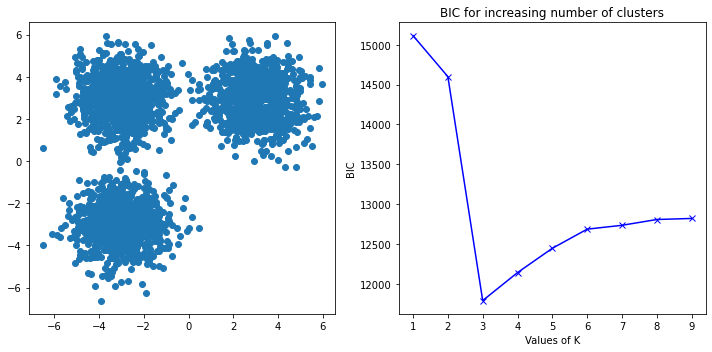

In [4]:
## Test for clearly clustered data, does the BIC function work correctly and how does the BIC indicate the nr of clusters?
from numpy.random import multivariate_normal as rnorm
centers = np.array([[3,3],[-3,3],[-3,-3]])
cov = np.array([[1,0],[0,1]])
x1 = rnorm(centers[0], cov, size=1000)
x2 = rnorm(centers[1], cov, size=1000)
x3 = rnorm(centers[2], cov, size=1000)
x  = np.array([row for row_group in zip(x1, x2, x3) for row in row_group])

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
ax0.scatter(x=x[:,0], y=x[:,1])

BIC = []
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=5, init='k-means++').fit(x)
    
    BIC.append(BIC_kmeans(kmeans, x))

ax1.plot(K, BIC, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('BIC')
plt.title('BIC for increasing number of clusters')
plt.tight_layout()
plt.show()

# Works perfectly when with spherical gaussians of equal size, EMI data are not spherical gaussians! some variables are strongly correlated.

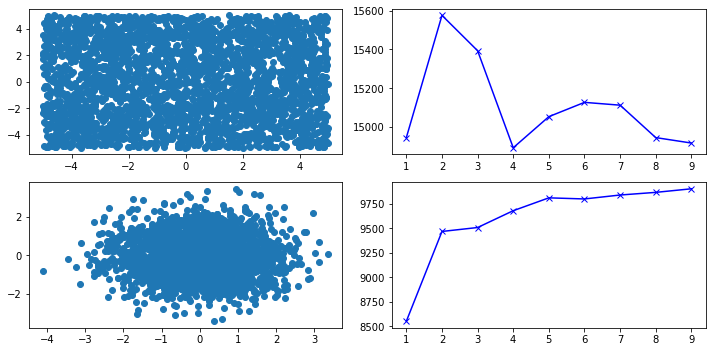

In [5]:
# What if the distributions is more uniform or just one cluster

from numpy.random import uniform as uni

y1 = uni(low=-5, high = 5, size = 3000)
x1 = uni(low=-5, high=5, size=3000)

x_uni = np.stack((x1, y1), axis=1)
x_sph = rnorm((0,0), [[1,0],[0,1]], size=3000)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10,5))
ax0.scatter(x=x_uni[:,0], y=x_uni[:,1])
ax2.scatter(x=x_sph[:,0], y=x_sph[:,1])

BIC_uni = []
BIC_sph=[]
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeans_uni = KMeans(n_clusters=k, random_state=0, n_init=5, init='k-means++').fit(x_uni)
    kmeans_sph = KMeans(n_clusters=k, random_state=0, n_init=5, init='k-means++').fit(x_sph)
    
    BIC_uni.append(BIC_kmeans(kmeans_uni, x_uni))
    BIC_sph.append(BIC_kmeans(kmeans_sph, x_sph))
    

ax1.plot(K, BIC_uni, 'bx-')
ax3.plot(K, BIC_sph, 'bx-')
plt.tight_layout()
plt.show()